In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

## Kicks

In [27]:
kickDF = pd.read_csv('KickingDF.csv')
# kickDF = kickDF.drop(121)
kickDF2 = kickDF[kickDF['FGA'] >= 10]

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
corrDF = kickDF2.corr(method='spearman')
corrDF[['FG%','XP%']].loc[['OVR','KDi', 'KAc', 'END', 'INT', 'STR']].sort_values('FG%',ascending=False)

,FG%,XP%
KDi,0.528311,0.092141
KAc,0.507746,0.155085
OVR,0.477108,0.120856
END,0.333567,0.097628
INT,0.181421,0.087528
STR,0.100788,-0.084036


In [30]:
kickDF2.columns

Index(['Unnamed: 0', 'teamID', '20-29', '30-39', '40-49', '50+', '<20', 'ACC',
       'AGI', 'ARM', 'END', 'FG%', 'FGA', 'FGM', 'G', 'HND', 'INT', 'KAc',
       'KDi', 'L', 'Lng', 'Name', 'OVR', 'PA', 'PBl', 'PF', 'Player', 'Pos',
       'RBl', 'S', 'SPE', 'STR', 'T', 'TCK', 'Team', 'W', 'WPct', 'XP%', 'XPA',
       'XPM'],
      dtype='object')

In [31]:
plt.style.use('fivethirtyeight')

In [32]:
micycleDF = kickDF2.loc[kickDF2.Player == 'McCormick, M.']
deanDF = kickDF2.loc[kickDF2.Player == 'Jackson, D.']
turkDF = kickDF2.loc[kickDF2.Player == 'Turkleton, T.']
fultureDF = kickDF2.loc[kickDF2.Player == 'Fulture, K.']
alexDF = kickDF2.loc[kickDF2.Player == 'Dasistwirklichseinnachname, A.']
fDF = kickDF2.loc[kickDF2.Player == 'Forfeit, N.']
harrisDF = kickDF2.loc[kickDF2.Player == 'Harris, S.']
neoDF = kickDF2.loc[kickDF2.Player == 'Donaldson, N.']

In [35]:
def plotXY(x,y,saveFig=False):
    fig = plt.figure(figsize=(8,6),facecolor='w')
    plt.rcParams['font.family'] = 'Roboto Mono'
    plt.rcParams['font.weight'] = 'medium'
    plt.xticks(fontname = 'NovaMono',weight='medium')
    plt.yticks(fontname = 'NovaMono',weight='medium')
    plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),weight='bold')
    plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10)
    plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
    plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
    plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
    plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
    plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='black',marker='>')
    plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
    plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout()
    
    if saveFig:
        plt.savefig('images/Kick-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
        
    plt.show()

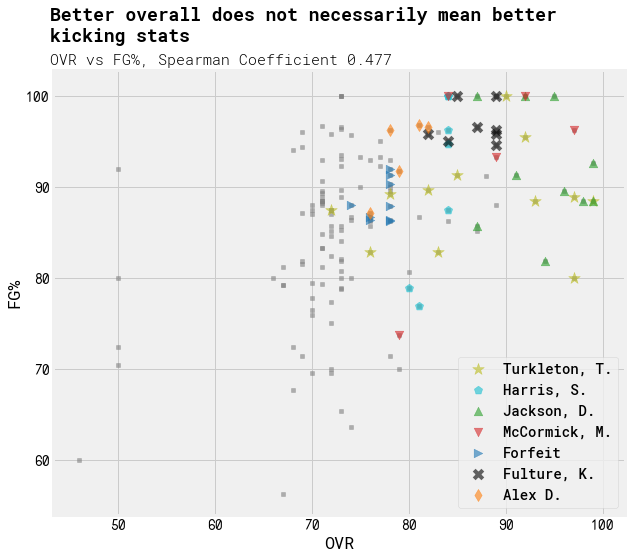

In [340]:
x = 'OVR'
y = 'FG%'
alph = 0.6
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(43,106,'Better overall does not necessarily mean better \nkicking stats',weight='bold',size=18)
plt.text(43,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Kick-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

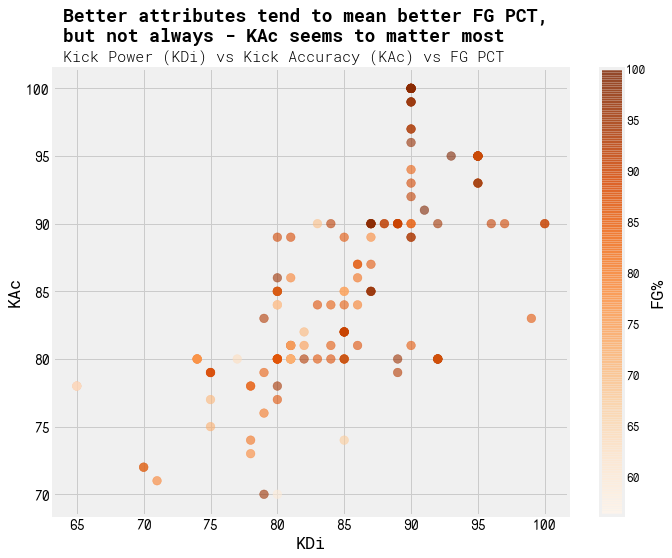

In [346]:
x = 'KDi'
y = 'KAc'
alph = 0.6
cmap = plt.get_cmap('Oranges')
fig = plt.figure(figsize=(10,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],s=75,marker='o',c=kickDF2['FG%'],cmap=cmap,alpha=alph)
plt.text(64,103.5,'Better attributes tend to mean better FG PCT,\nbut not always - KAc seems to matter most',weight='bold',size=18)
plt.text(64,102,'Kick Power (KDi) vs Kick Accuracy (KAc) vs FG PCT',size=15,weight='light')
cbar = plt.colorbar()
cbar.set_label('FG%')
for l in cbar.ax.yaxis.get_ticklabels():
    l.set_fontfamily('NovaMono')
    l.set_weight("light")
    l.set_fontsize(12)
plt.xlabel(x)
plt.ylabel(y)
# plt.legend()
plt.tight_layout()
plt.savefig('images/Kick-%s-%s.png'%('KDi','KAc'),facecolor=fig.get_facecolor())
plt.show()

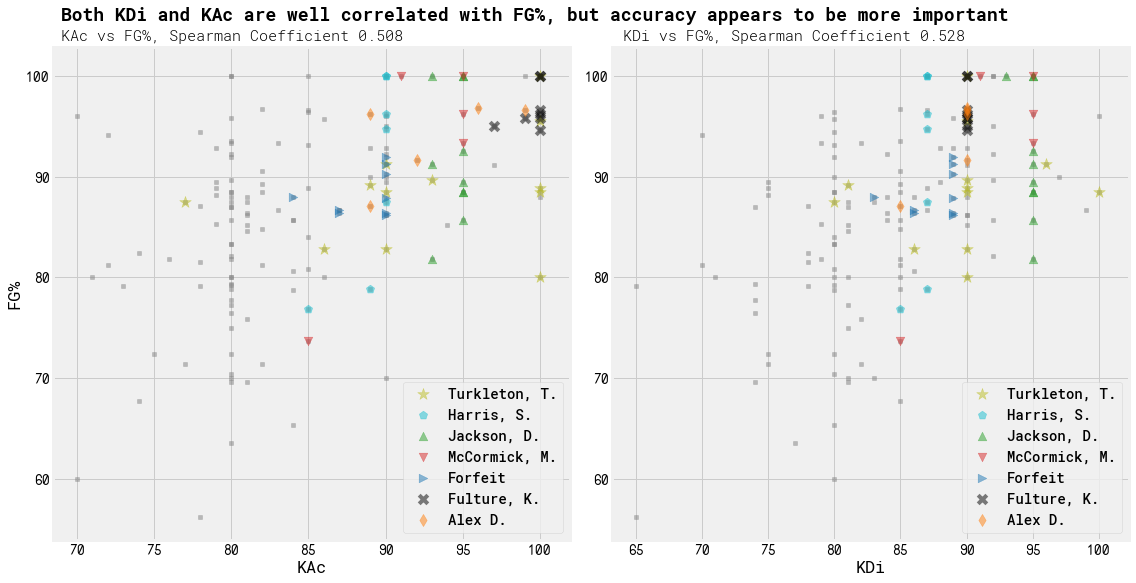

In [339]:
statPlt = plt.figure(figsize=(16,8),facecolor='w')
y = 'FG%'
alph = 0.5
statPlt.add_subplot(1,2,1)
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

plt.figtext(0.06,0.99,'Both KDi and KAc are well correlated with FG%, but accuracy appears to be more important',weight='bold',size=18)

x = 'KAc'
plt.text(69,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),weight='light',size=15)
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

statPlt.add_subplot(1,2,2)
x = 'KDi'

plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.text(64,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),weight='light',size=15)
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.xlabel(x)
# plt.ylabel(y)
plt.legend()

plt.tight_layout()
plt.savefig('images/FG-KAc-KDi.png',facecolor=statPlt.get_facecolor())
plt.show()

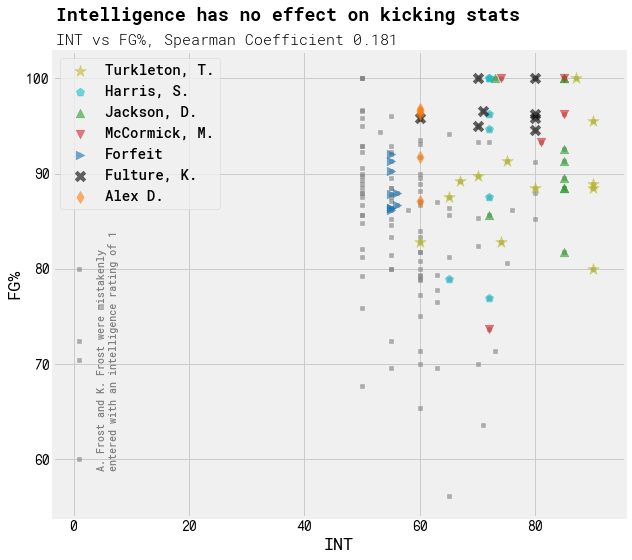

In [337]:
x = 'INT'
y = 'FG%'
alph = 0.6
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(kickDF2[x],kickDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(turkDF[x],turkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(harrisDF[x],harrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(deanDF[x],deanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(micycleDF[x],micycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(fDF[x],fDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(fultureDF[x],fultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(alexDF[x],alexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(-3,106,'Intelligence has no effect on kicking stats',weight='bold',size=18)
plt.text(-3,103.5,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrDF.loc[y][x]),size=15,weight='light')
plt.text(4,59,'A. Frost and K. Frost were mistakenly \nentered with an intelligence rating of 1',c='gray',size=10,rotation=90)
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Kick-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

In [320]:
acc100 = kickDF2[kickDF2.KAc == 100]
acc100[['Name','FGA','FGM','FG%']]

,Name,FGA,FGM,FG%
40,"Turkleton, T.",25.0,20.0,80.0
48,"Turkleton, T.",26.0,23.0,88.5
56,"Turkleton, T.",18.0,16.0,88.9
61,"Blewitt, I.",25.0,22.0,88.0
64,"Turkleton, T.",22.0,21.0,95.5
71,"Blewitt, I.",32.0,32.0,100.0
72,"Turkleton, T.",30.0,30.0,100.0
102,"Fulture, K.",29.0,28.0,96.6
110,"Fulture, K.",24.0,24.0,100.0
118,"Fulture, K.",26.0,25.0,96.2


In [321]:
turk100 = acc100[acc100.Name == 'Turkleton, T.']
blewitt100 = acc100[acc100.Name == 'Blewitt, I.']
fulture100 = acc100[acc100.Name == 'Fulture, K.']

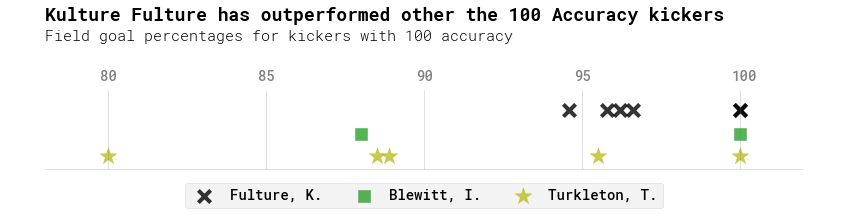

In [323]:
x = 'KAc'
y = 'FG%'
alph = 0.8
fig = plt.figure(figsize=(12,4),facecolor='w')
plt.axis('off')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.hlines(100,78,102,color='gray',alpha=0.5,lw=0.5)
plt.vlines(80,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(80,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(79.75,102.25,'80',color='gray')
plt.vlines(85,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(85,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(84.75,102.25,'85',color='gray')
plt.vlines(90,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(90,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(89.75,102.25,'90',color='gray')
plt.vlines(95,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(95,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(94.75,102.25,'95',color='gray')
plt.vlines(100,99,100,color='w',alpha=0.5,lw=0.5)
plt.vlines(100,100,102,color='gray',alpha=0.5,lw=0.5)
plt.text(99.75,102.25,'100',color='gray')
plt.scatter(fulture100[y],fulture100[x]+1.5,label='Fulture, K.',s=150,c='k',marker='x',alpha=alph)
plt.scatter(blewitt100[y],blewitt100[x]+.888,marker=',',c='tab:green',s=150,alpha=alph,label='Blewitt, I.')
plt.scatter(turk100[y],turk100[x]+.33,label='Turkleton, T.',s=300,c='tab:olive',marker='*',alpha=alph)
plt.text(78,103.75,'Kulture Fulture has outperformed other the 100 Accuracy kickers',weight='bold',size=18)
plt.text(78,103.25,'Field goal percentages for kickers with 100 accuracy',size=15,weight='light')
plt.xlabel(y)
plt.ylabel(x)
# plt.ylim(90,110)
plt.legend(ncol=3,loc=8)
plt.tight_layout()
plt.savefig('images/100Accuracy.png',facecolor=fig.get_facecolor())
plt.show()

In [324]:
fg100df = kickDF2.loc[kickDF2['FG%'] == 100]
fg100df[['Name','S','Team','W','L','FGM','FG%','XPM','XP%','KDi','KAc']].sort_values(['XP%','S'],ascending=[False,True]).set_index('Name').to_csv('FG100.csv')

In [325]:
# print('turk')
turkDF[['S','KAc','KDi','FG%','XP%']].to_csv('turk.csv')
pturkDF[['S','KAc','KDi','Avg','Long']].to_csv('turkP.csv')

In [326]:
# print('fulture')
fultureDF[['S','KAc','KDi','FG%','XP%']].to_csv('fulture.csv')
pfultureDF[['S','KAc','KDi','Avg','Long']].to_csv('fultureP.csv')

## Punts

In [43]:
puntDF2 = pd.read_csv('PuntingDF.csv')

In [44]:
puntDF2.columns

Index(['Unnamed: 0', 'teamID', 'ACC', 'AGI', 'ARM', 'Avg', 'END', 'G', 'HND',
       'INT', 'Inside 20', 'KAc', 'KDi', 'L', 'Long', 'Name', 'OVR', 'PA',
       'PBl', 'PF', 'Player', 'Pos', 'Punts', 'RBl', 'S', 'SPE', 'STR', 'T',
       'TCK', 'Team', 'W', 'WPct', 'Yds'],
      dtype='object')

In [45]:
corrPuntDF = puntDF2.corr(method='spearman')
# corrPuntDF
corrPuntDF[['Avg','Long']].loc[['OVR','KDi', 'KAc', 'END', 'INT', 'STR']].sort_values('Avg',ascending=False)

,Avg,Long
KDi,0.729712,0.763915
OVR,0.596444,0.640412
KAc,0.555863,0.589052
END,0.366507,0.364916
INT,0.230034,0.273999
STR,0.177331,0.247154


In [46]:
pmicycleDF = puntDF2.loc[puntDF2.Player == 'McCormick, M.']
pdeanDF = puntDF2.loc[puntDF2.Player == 'Jackson, D.']
pturkDF = puntDF2.loc[puntDF2.Player == 'Turkleton, T.']
pfultureDF = puntDF2.loc[puntDF2.Player == 'Fulture, K.']
palexDF = puntDF2.loc[puntDF2.Player == 'Dasistwirklichseinnachname, A.']
pfDF = puntDF2.loc[puntDF2.Player == 'Forfeit, N.']
pharrisDF = puntDF2.loc[puntDF2.Player == 'Harris, S.']
pneoDF = puntDF2.loc[puntDF2.Player == 'Donaldson, N.']

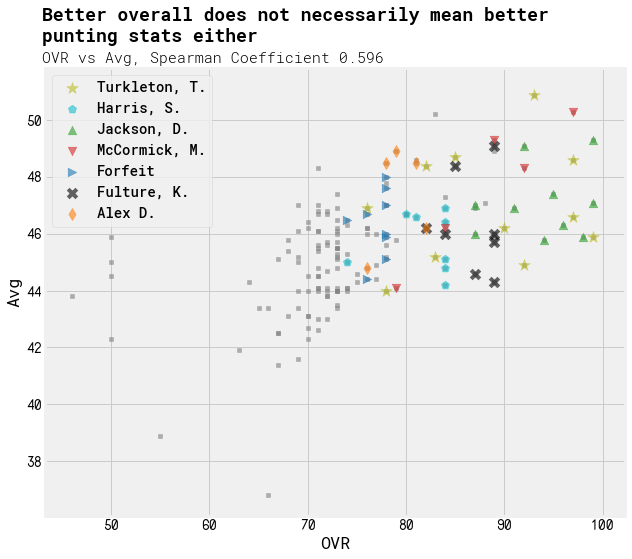

In [336]:
x = 'OVR'
y = 'Avg'
alph = 0.6
fig = plt.figure(figsize=(9,8),facecolor='w')
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10,alpha=alph)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*',alpha=alph)
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p',alpha=alph)
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^',alpha=alph)
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v',alpha=alph)
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='tab:blue',marker='>',alpha=alph)
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='k',marker='x',alpha=alph)
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d',alpha=alph)
plt.text(43,52.75,'Better overall does not necessarily mean better \npunting stats either',weight='bold',size=18)
plt.text(43,52,'%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),size=15,weight='light')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.tight_layout()
plt.savefig('images/Punt-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
plt.show()

In [47]:
def plotXYpunt(x,y,saveFig=False):
    fig = plt.figure(figsize=(8,8),facecolor='w')
    plt.rcParams['font.family'] = 'Roboto Mono'
    plt.rcParams['font.weight'] = 'medium'
    plt.xticks(fontname = 'NovaMono',weight='medium')
    plt.yticks(fontname = 'NovaMono',weight='medium')
    plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='bold')
    plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10)
    plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
    plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
    plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
    plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
    plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='black',marker='>')
    plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
    plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.tight_layout()
    
    if saveFig:
        plt.savefig('images/Punt-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
        
    plt.show()

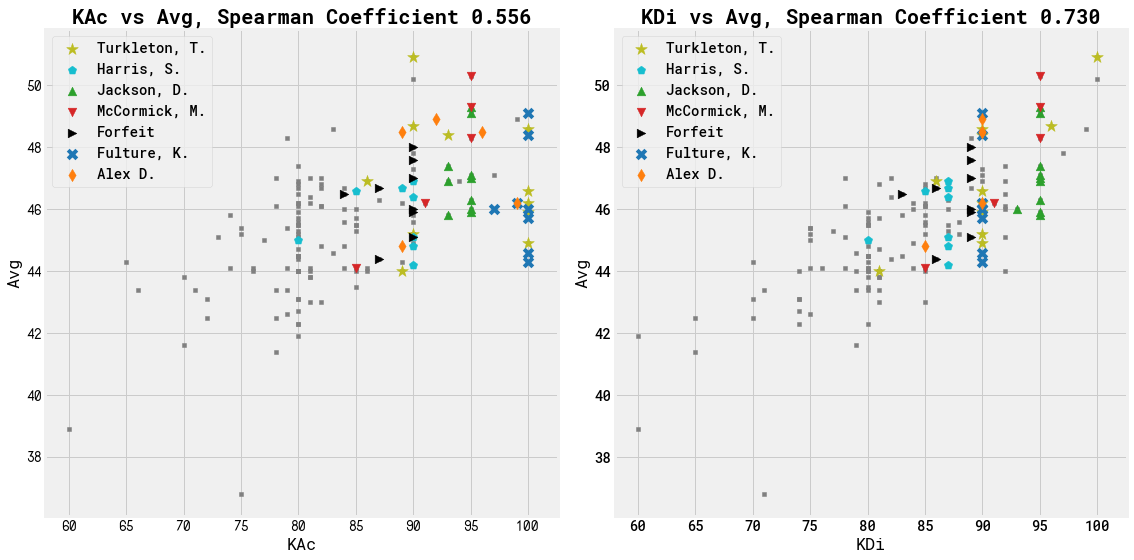

In [51]:
statPlt = plt.figure(figsize=(16,8),facecolor='w')
y = 'Avg'

statPlt.add_subplot(1,2,1)
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

x = 'KAc'
plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='bold')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='black',marker='>')
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

statPlt.add_subplot(1,2,2)
x = 'KDi'
plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='bold')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='black',marker='>')
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

plt.tight_layout()
plt.savefig('images/Punt-Avg-KAc-KDi.png',facecolor=statPlt.get_facecolor())
plt.show()

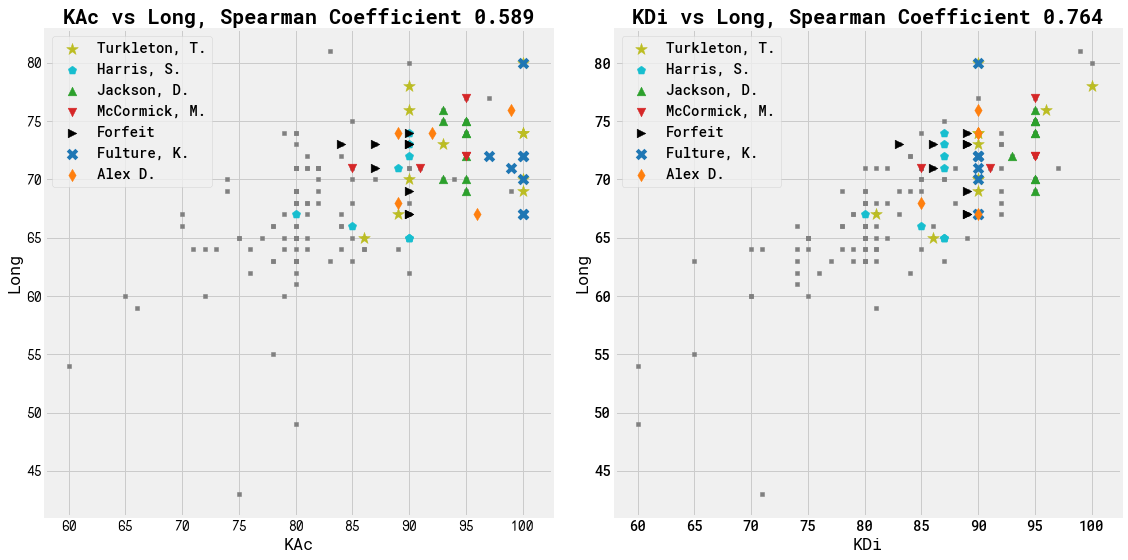

In [52]:
statPlt = plt.figure(figsize=(16,8),facecolor='w')
y = 'Long'

statPlt.add_subplot(1,2,1)
plt.rcParams['font.family'] = 'Roboto Mono'
plt.rcParams['font.weight'] = 'medium'
plt.xticks(fontname = 'NovaMono',weight='medium')
plt.yticks(fontname = 'NovaMono',weight='medium')

x = 'KAc'
plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='bold')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='black',marker='>')
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

statPlt.add_subplot(1,2,2)
x = 'KDi'
plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPuntDF.loc[y][x]),weight='bold')
plt.scatter(puntDF2[x],puntDF2[y],marker=',',c='gray',s=10)
plt.scatter(pturkDF[x],pturkDF[y],label='Turkleton, T.',s=150,c='tab:olive',marker='*')
plt.scatter(pharrisDF[x],pharrisDF[y],label='Harris, S.',s=75,c='tab:cyan',marker='p')
plt.scatter(pdeanDF[x],pdeanDF[y],label='Jackson, D.',s=75,c='tab:green',marker='^')
plt.scatter(pmicycleDF[x],pmicycleDF[y],label='McCormick, M.',s=75,c='tab:red',marker='v')
plt.scatter(pfDF[x],pfDF[y],label='Forfeit',s=75,c='black',marker='>')
plt.scatter(pfultureDF[x],pfultureDF[y],label='Fulture, K.',s=75,c='tab:blue',marker='x')
plt.scatter(palexDF[x],palexDF[y],label='Alex D.',s=75,c='tab:orange',marker='d')
plt.xlabel(x)
plt.ylabel(y)
plt.legend()

plt.tight_layout()
plt.savefig('images/Punt-Long-KAc-KDi.png',facecolor=statPlt.get_facecolor())
plt.show()

## Passing

In [40]:
passDF = pd.read_csv('PassingDF.csv')

In [43]:
passDF.columns

Index(['Unnamed: 0', 'teamID', 'ACC', 'AGI', 'ARM', 'Att', 'Comp', 'END', 'G',
       'HND', 'INT', 'Int', 'KAc', 'KDi', 'L', 'Lg', 'Name', 'OVR', 'PA',
       'PBl', 'PF', 'Pct', 'Player', 'Pos', 'RBl', 'Rating', 'S', 'SPE', 'STR',
       'T', 'TCK', 'TD', 'Team', 'W', 'WPct', 'Yards'],
      dtype='object')

In [82]:
passDF = passDF[passDF.Att >= 100]

In [83]:
corrPass = passDF.corr('spearman')
corrPass[['Yards','Pct','TD','Int','Rating']].loc[['OVR','ARM','ACC','INT']]

,Yards,Pct,TD,Int,Rating
OVR,0.501715,0.251397,0.561449,-0.261592,0.546693
ARM,0.519701,0.220830,0.571199,-0.258767,0.559875
ACC,0.532920,0.262893,0.577754,-0.298443,0.571203
INT,0.525440,0.296268,0.561513,-0.239013,0.555133


In [89]:
passDF.sort_values('Name').Player.unique()

array(['(R) Applehort, R.', '(R) Christ, J.', '(R) Falconi, A.',
       '(R) Fitzpatrick, K.', '(R) Pennington, B.', '(R) Showbiz, G.',
       'Akselsen, M.', 'Applehort, R.', 'Armstrong (R), F.',
       'Armstrong, F.', 'Bercovici, J.', 'Bigsby, C.', 'Blocksdale, A.',
       'Boss, M.', 'Bronko, K.', 'Christ, J.', 'Cole (R), E.', 'Cole, E.',
       'Draxel, V.', 'Falconi, A.', 'Fitzpatrick, K.', 'Francisco, S.',
       'Gambino, C.', 'Havran (R), C.', 'Havran, C.', 'Hunt, E.',
       'Jenkins (R), R.', 'Jenkins, R.', 'Kyubee, S.', 'Maximus III, B.',
       'McCormick, M.', 'McDummy (R), W.', 'McDummy, W.', 'Noble, L.',
       'Oles, T.', 'Orosz, C.', 'Pennington, B.', 'Pierno, N.',
       'Reese, A.', 'Rove, C.', 'Showbiz, G.', 'Stone, W.', 'Wright, D.'],
      dtype=object)

In [90]:
wolfDFpass = passDF.loc[(passDF.Player == 'McDummy, W.') | (passDF.Player == 'McDummy (R), W.')]
micycleDFpass = passDF.loc[(passDF.Player == 'McCormick, M.')]
bossDFpass = passDF.loc[(passDF.Player == 'Boss, M.')]
corvoDFpass = passDF.loc[(passDF.Player == 'Havran, C.') | (passDF.Player == 'Havran (R), C.')]
coleDFpass = passDF.loc[(passDF.Player == 'Cole, E.') | (passDF.Player == 'Cole (R), E.')]
reeseDFpass = passDF.loc[(passDF.Player == 'Reese, A.') | (passDF.Player == 'Reese (R), A.')]
armstrongDFpass = passDF.loc[(passDF.Player == 'Armstrong, F.') | (passDF.Player == 'Armstrong (R), F.')]
stanDFpass = passDF.loc[(passDF.Player == 'Francisco, S.') | (passDF.Player == 'Francisco (R), S.')]
roseDFpass = passDF.loc[(passDF.Player == 'Jenkins, R.') | (passDF.Player == 'Jenkins (R), R.')]
cooterDFpass = passDF.loc[(passDF.Player == 'Bigsby, C.') | (passDF.Player == 'Bigsby (R), C.')]
christDFpass = passDF.loc[(passDF.Player == 'Christ, J.') | (passDF.Player == '(R) Christ, J.')]
falcDFpass = passDF.loc[(passDF.Player == 'Falconi, A.') | (passDF.Player == '(R) Falconi, A.')]
danDFpass = passDF.loc[(passDF.Player == 'Wright, D.')]

In [112]:
def plotXYpass(x,y,saveFig=False):
    fig = plt.figure(figsize=(11,8),facecolor='w')
    plt.rcParams['font.family'] = 'Roboto Mono'
    plt.rcParams['font.weight'] = 'medium'
    plt.xticks(fontname = 'NovaMono',weight='medium')
    plt.yticks(fontname = 'NovaMono',weight='medium')
    plt.title('%s vs %s, Spearman Coefficient %.3f'%(x,y,corrPass.loc[y][x]),weight='bold')
    plt.scatter(passDF[x],passDF[y],marker=',',c='darkgray',s=10)
    plt.scatter(wolfDFpass[x],wolfDFpass[y],label='McDummy, W.',s=75,marker='v')
    plt.scatter(corvoDFpass[x],corvoDFpass[y],label='Havran, C.',s=75,marker='^')
    plt.scatter(coleDFpass[x],coleDFpass[y],label='Cole, E.',s=75,marker='D')
    plt.scatter(reeseDFpass[x],reeseDFpass[y],label='Reese, A.',s=75,marker='s')
    plt.scatter(armstrongDFpass[x],armstrongDFpass[y],label='Armstrong, F.',s=75,marker='o')
    plt.scatter(stanDFpass[x],stanDFpass[y],label='Francisco, S.',s=75,marker='d')
    plt.scatter(roseDFpass[x],roseDFpass[y],label='Jenkins, R.',s=75,marker='>')
    plt.scatter(cooterDFpass[x],cooterDFpass[y],label='Bigsby, C.',s=75,marker='<')
#     plt.scatter(falcDFpass[x],falcDFpass[y],label='Falconi, A.',s=75,marker='p')
#     plt.scatter(danDFpass[x],danDFpass[y],label='Wright, D.',s=150,marker='*')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(bbox_to_anchor=(1, 1.01), loc='upper left', ncol=1)
    plt.tight_layout()
    
    if saveFig:
        plt.savefig('images/Pass-%s-%s.png'%(x,y),facecolor=fig.get_facecolor())
        
    plt.show()

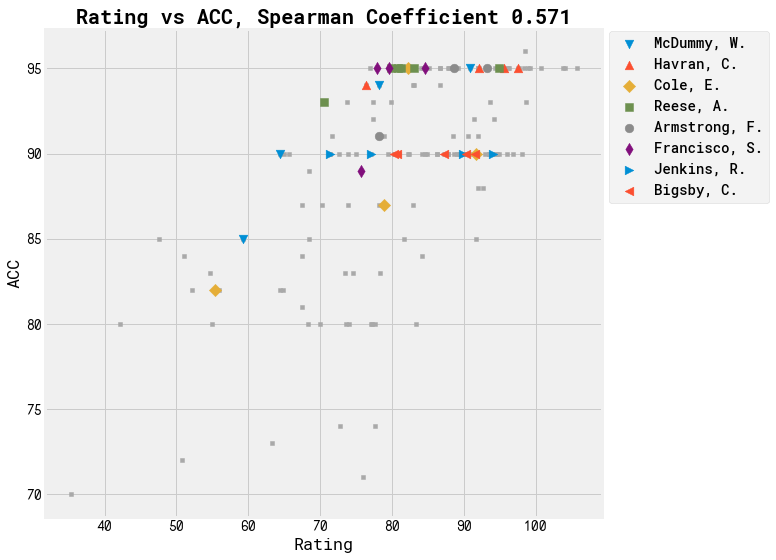

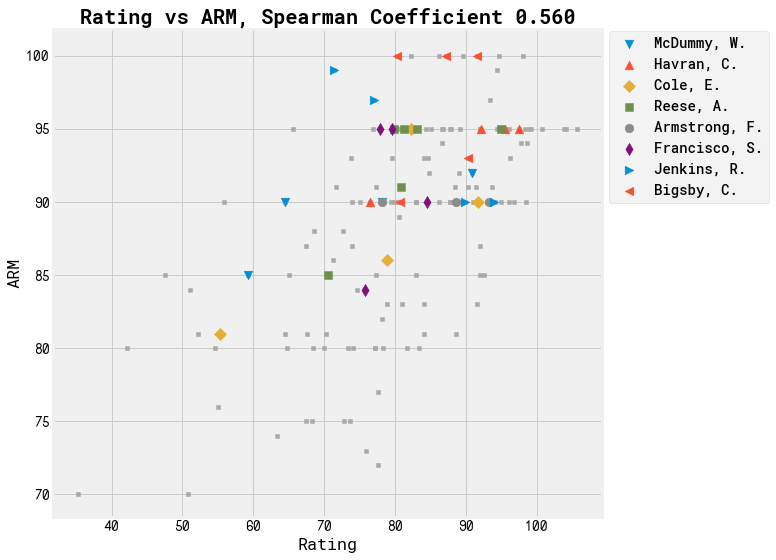

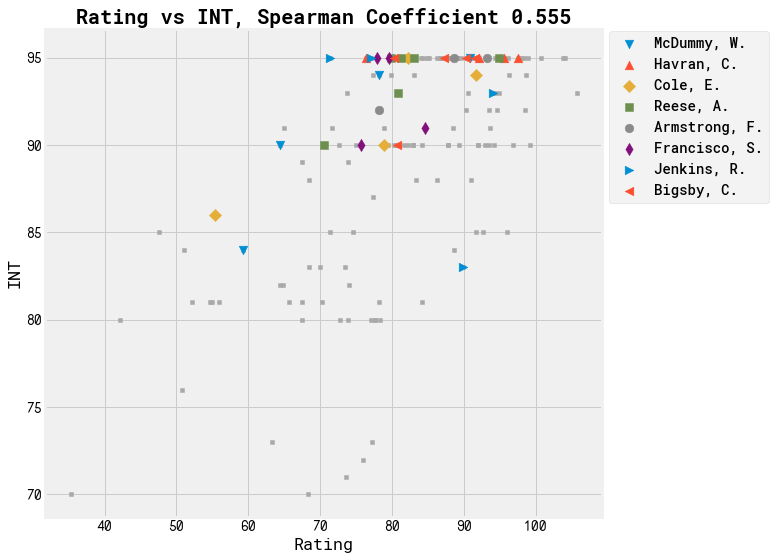

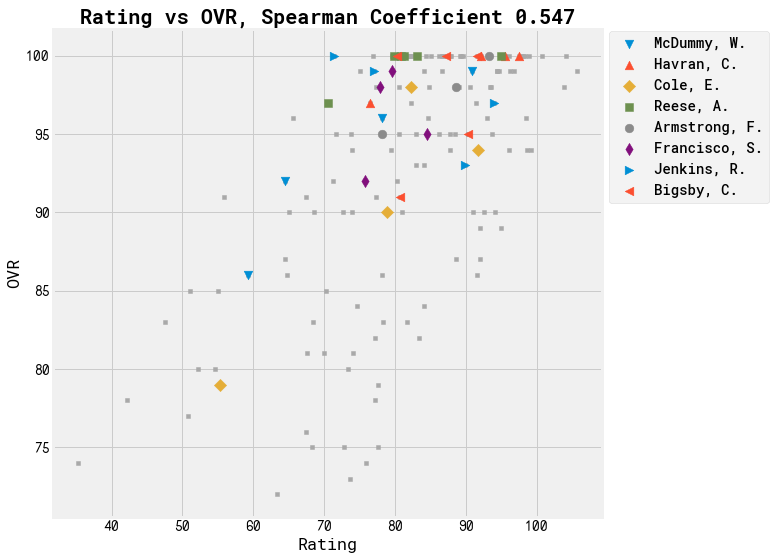

In [113]:
plotXYpass('ACC','Rating',saveFig=True)
plotXYpass('ARM','Rating',saveFig=True)
plotXYpass('INT','Rating',saveFig=True)
plotXYpass('OVR','Rating',saveFig=True)